<a href="https://colab.research.google.com/github/VadorInPython/Bachelor_Thesis/blob/main/Bachelor_thesis_working_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import pakietów**

In [43]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import os
import random
import opendatasets as od
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split

#**Wczytanie danych**

In [45]:
pics = od.download("https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset")

Skipping, found downloaded files in "./militaryaircraftdetectiondataset" (use force=True to force download)


In [46]:
data = '/content/militaryaircraftdetectiondataset/crop'

#**Uzyskanie klas samolotów i przedstawienie ich na wykresie**

In [47]:
data_1 = os.walk(data)
data_1

<generator object _walk at 0x7f7129a5c660>

In [48]:
def get_classes(data):
  lst = []
  for root, plane_type, photo in data_1:
    lst.extend(plane_type)
    num = len(lst)
    break
  return lst, num

In [49]:
print(get_classes(data))

(['F18', 'YF23', 'JAS39', 'US2', 'F15', 'SR71', 'Su34', 'F117', 'F4', 'F35', 'C130', 'C2', 'XB70', 'Rafale', 'F16', 'C17', 'E7', 'EF2000', 'AV8B', 'B1', 'B52', 'C5', 'Be200', 'Mirage2000', 'E2', 'MQ9', 'A10', 'RQ4', 'Mig31', 'Tornado', 'B2', 'U2', 'F22', 'Tu160', 'F14', 'V22', 'Vulcan', 'AG600', 'A400M', 'Su57', 'J20', 'P3', 'Tu95'], 43)


Poniżej wrzuciłem podłogi, ponieważ ułatwiły mi one określenie tego co jest istotne w danych elementach kodu.

In [50]:
def count_image_per_class(data):
    labels = os.walk(data)
    counts = {}
    for root, plane_types, _ in labels:
        for plane_type in plane_types:
            type_path = os.path.join(root, plane_type)
            count = 0
            for _, _, files in os.walk(type_path):
                count += len(files)
            counts[plane_type] = count
    return counts

In [51]:
summary = count_image_per_class(data)
summary

{'F18': 1049,
 'YF23': 129,
 'JAS39': 423,
 'US2': 554,
 'F15': 1053,
 'SR71': 236,
 'Su34': 255,
 'F117': 289,
 'F4': 500,
 'F35': 878,
 'C130': 766,
 'C2': 589,
 'XB70': 149,
 'Rafale': 432,
 'F16': 1060,
 'C17': 420,
 'E7': 99,
 'EF2000': 457,
 'AV8B': 350,
 'B1': 514,
 'B52': 424,
 'C5': 314,
 'Be200': 235,
 'Mirage2000': 347,
 'E2': 355,
 'MQ9': 262,
 'A10': 547,
 'RQ4': 265,
 'Mig31': 284,
 'Tornado': 348,
 'B2': 404,
 'U2': 234,
 'F22': 520,
 'Tu160': 241,
 'F14': 428,
 'V22': 700,
 'Vulcan': 296,
 'AG600': 182,
 'A400M': 318,
 'Su57': 286,
 'J20': 439,
 'P3': 104,
 'Tu95': 233}

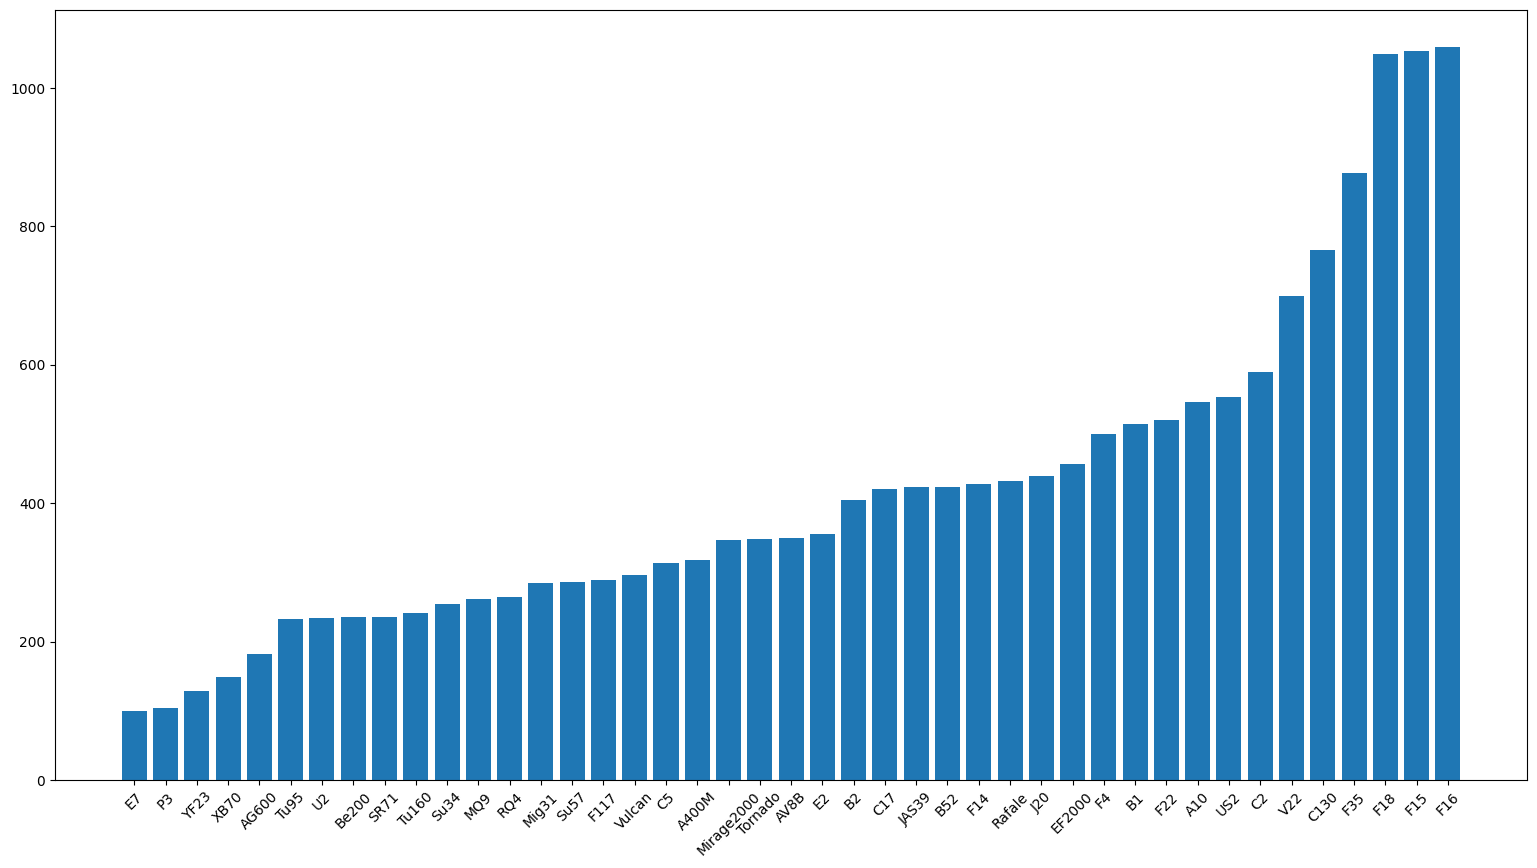

In [52]:
counts = count_image_per_class(data)

types = list(counts.keys())
values = list(counts.values())

sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
types = [types[i] for i in sorted_indices]
values = [values[i] for i in sorted_indices]

plt.figure(figsize=(19, 10))
plt.bar(range(len(types)), values, tick_label=types)
plt.xticks(rotation=45)
plt.show()

#**Przetworzenie danych pod sieć (normalizacja + przeskalowanie + zapisanie w osobnym pliku)**

In [53]:
def normal_and_save(data):
  output_file = "/content/normalized_data"
  os.makedirs(output_file, exist_ok = True)
  normalized_files = []
  
  for root, plane_type, photos in os.walk(data):
      for photo in photos:
          photo_path = os.path.join(root, photo)
          image = Image.open(photo_path).convert("RGB")
          newsize = (256, 256)
          image_res = np.array(image.resize(newsize)) / 255

          #Znalezienie relatywnej ścieżki dostępu (czyli takiej na której aktualnie pracujemy i stworzenie tak samo nazwanych folderów w normalized_data)
          rel_path = os.path.relpath(root, data)
          output_plane_type = os.path.join(output_file, rel_path)
          os.makedirs(output_plane_type, exist_ok = True)

          #zapisanie znormalizowanych zdjęć w nowo utworzonych folderach
          output_path = os.path.join(output_plane_type, photo)
          Image.fromarray((image_res * 255).astype(np.uint8)).save(output_path)
          normalized_files.append(output_path)

  return normalized_files   

In [ ]:
normal_and_save(data)

##**Wyświetlenie kilku przykładowych zdjęć po normalizacji.**##

In [62]:
random.choice(os.listdir("/content/normalized_data"))

'A10'

In [150]:
def show_img(data):
  start_path = "/content/normalized_data"
  photo_paths = []
  
  for root, plane_type, photos in os.walk(start_path):
    for photo in photos:
      photo_path = os.path.join(root, photo)
      photo_paths.append(photo_path)

  if photo_paths:
      random_photo = random.choice(photo_paths)
      random_img = img.imread(random_photo)
      plt.imshow(random_img)
      return random_photo     

'/content/normalized_data/Rafale/350f04fe17aa6a28ef2ca3ea0a520bb0_0.jpg'

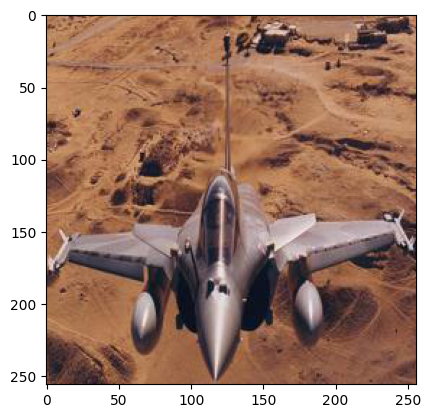

In [180]:
data = "/content/normalized_data"
show_img(data)

##**Podzielenie zbioru znormalizowanych zdjęć na treningowy, testowy i walidacyjny**##

In [ ]:
def train_test_split(data):
  